In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
from skimage.morphology import (erosion,dilation,opening,closing,white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image ,disk

In [ ]:
!wget 


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1.

In [ ]:
N=501
x2 = (N-1)/2
x1 = -x2
x,y = np.meshgrid(np.arange(x1,x2),np.arange(x1,x2))
r= np.sqrt(x**2 + y**2)
km = 0.7*np.pi
rm = x2;
w = rm/10;
term1 = np.sin( (km * (r**2)) / (2 * rm) );
term2 = 0.5*np.tanh((rm - r)/w) + 0.5;
g = term1 * term2;
I = (g + 1)/2;

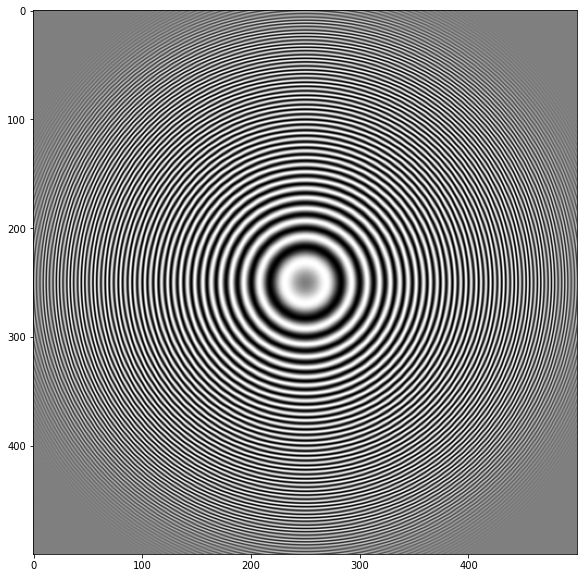

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(I,cmap="gray")
plt.show()

In [ ]:
I

array([[0.5       , 0.50010837, 0.49986643, ..., 0.50004052, 0.49986643,
        0.50010837],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       ...,
       [0.50004052, 0.50009852, 0.49983285, ..., 0.50009248, 0.49983285,
        0.50009852],
       [0.49986643, 0.50004307, 0.50009745, ..., 0.49983285, 0.50009745,
        0.50004307],
       [0.50010837, 0.499866  , 0.50004307, ..., 0.50009852, 0.50004307,
        0.499866  ]])

# i

In [ ]:
I=I*255
I=I.astype(np.int8)

In [ ]:
I

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=int8)

In [ ]:
I.shape

(500, 500)

# ii

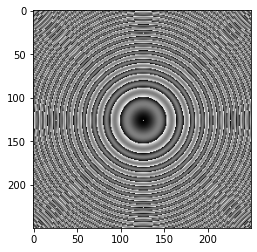

In [ ]:
I_cropped = I[249-125:249+125, 249-125:249+125]
plt.imshow(I_cropped,cmap="gray")
plt.show()

# iii

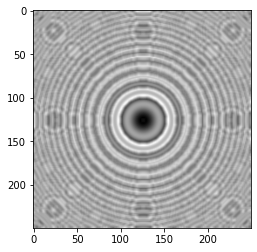

In [ ]:
I_cropped=I_cropped.astype(np.float32)
I_gaussian_blur1 = cv2.GaussianBlur(I_cropped,(5,5),2,cv2.BORDER_DEFAULT)
plt.imshow(I_gaussian_blur1,cmap = 'gray')

# iv

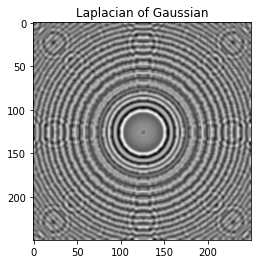

In [ ]:
ksize=7
lapedges = cv2.Laplacian(I_gaussian_blur1, cv2.CV_64F, ksize=ksize) 

plt.imshow(lapedges,cmap="gray")
plt.title('Laplacian of Gaussian')
plt.show()

# v

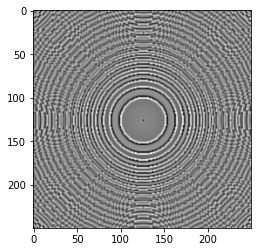

In [ ]:
Gaussian_blur_low_sigma = cv2.GaussianBlur(I_cropped,(5,5),1)

Gaussian_blur_high_sigma = cv2.GaussianBlur(I_cropped,(5,5),5)

dog=Gaussian_blur_high_sigma-Gaussian_blur_low_sigma

plt.imshow(dog,cmap="gray")
plt.show()

# vi

In [ ]:
from tensorflow.keras.preprocessing import image
lapedges = image.img_to_array(lapedges, dtype='uint8')
R,otsu_thresholding=cv2.threshold(lapedges,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)

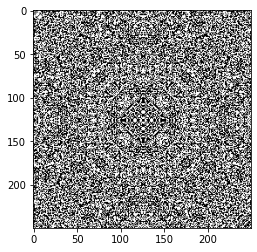

In [ ]:
plt.imshow(otsu_thresholding,cmap="gray")

# 2

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/Fig1.png

--2022-02-21 06:11:12--  https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/Fig1.png
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/Fig1.png [following]
--2022-02-21 06:11:12--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/Fig1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4181 (4.1K) [image/png]
Saving to: ‘Fig1.png.1’

Fig1.png.1          100%[===================>]   4.08K  --.-KB/s    in 0s      

2022-02-21 06:11:13 (47.5 MB/s) - ‘Fig1.png.1’ saved [4181/4181]



In [ ]:
image=plt.imread("Fig1.png")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

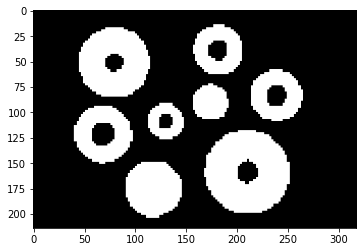

In [ ]:
plt.imshow(gray,cmap="gray")

In [ ]:
des = cv2.bitwise_not(gray)
des = des.astype('uint8')

contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[cnt],0,255,-1)

#gray = cv2.bitwise_not(des)

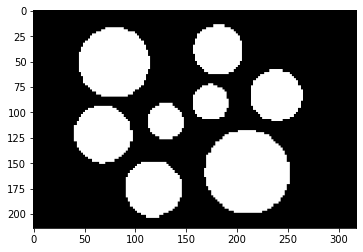

In [ ]:
plt.imshow(des,cmap="gray")

In [ ]:
num_labels, labels_im = cv2.connectedComponents(des)

In [ ]:
num_labels # 8 connected components in foreground and 1 background

9

# 3

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/Fig2.tif

--2022-02-21 05:21:54--  https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/Fig2.tif
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/Fig2.tif [following]
--2022-02-21 05:21:55--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/Fig2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44825 (44K) [image/tiff]
Saving to: ‘Fig2.tif.1’

Fig2.tif.1          100%[===================>]  43.77K  --.-KB/s    in 0.01s   

2022-02-21 05:21:55 (3.61 MB/s) - ‘Fig2.tif.1’ saved [44825/44825]



In [ ]:
image=plt.imread("Fig2.tif")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

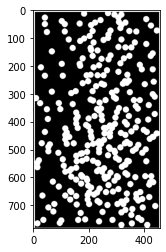

In [ ]:
plt.imshow(gray,cmap="gray")

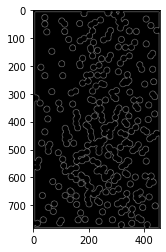

In [ ]:
edges = cv2.Canny(gray,30,300,None,3)
contours,hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img2=plt.imread("Fig2.tif")

cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)
plt.imshow(edges,cmap="gray")

In [ ]:
area=[]
selected=[]
for i in contours:
  area.append(cv2.contourArea(i))
  if cv2.contourArea(i)<100:
    selected.append(i)

In [ ]:
#area

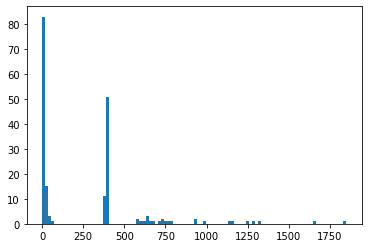

In [ ]:
a=plt.hist(area,bins=100)
plt.show()

In [ ]:
len(selected),len(area)

(102, 189)